### **1. Random Forest Classifier**

**With all features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data=pd.read_csv('/content/Hrv_ECG.csv')
df = pd.DataFrame(data)

X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

X.dropna(inplace=True)
y = y[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=20)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Model Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.50      0.38      0.43         8

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21



**With only few features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data_file=pd.read_csv('/content/Hrv_ECG - 77column.csv')
data=data_file.iloc[:,0:12]

df = pd.DataFrame(data)
print(df)

X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler .fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=20)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

      File_Name  Label          HR  HRV_MeanNN    HRV_SDNN   HRV_RMSSD  \
0   101_ECG.csv      0   70.400000  853.449190  124.895360  138.924959   
1   102_ECG.csv      1   92.280702  651.345881   64.650836   45.034029   
2   103_ECG.csv      0  116.047997  519.145613  100.764467  145.551364   
3   104_ECG.csv      0   82.962963  723.745638   92.501403   82.743193   
4   105_ECG.csv      0   92.089572  653.308258  116.347290   95.751922   
..          ...    ...         ...         ...         ...         ...   
95  215_ECG.csv      1  122.242991  490.622546   58.655961   84.655981   
96  216_ECG.csv      1  120.000000  500.792761   54.676641   52.688939   
97  217_ECG.csv      1  118.338149  506.521739   56.433043   47.691057   
98  218_ECG.csv      1  128.990648  465.175648   46.171036   56.181286   
99  219_ECG.csv      0   93.469388  642.465137   66.496420   64.812023   

      HRV_SDSD  HRV_Prc20NN  HRV_pNN50  HRV_Prc80NN  HRV_pNN20  HRV_MedianNN  
0   139.325837   803.505155  37.

### **2. XG BOOST**

In [ ]:
!pip -q install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

data=pd.read_csv('/content/Hrv_ECG.csv')
df = pd.DataFrame(data)

X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

X.dropna(inplace=True)
y = y[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=20)

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Model Accuracy: 0.5238095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.33      0.25      0.29         8

    accuracy                           0.52        21
   macro avg       0.47      0.47      0.46        21
weighted avg       0.50      0.52      0.51        21



### **Correlation matrix for feature filtering**

                    HR  HRV_MeanNN  HRV_SDNN  HRV_RMSSD  HRV_SDSD  \
HR            1.000000   -0.973557 -0.665720  -0.446198 -0.446211   
HRV_MeanNN   -0.973557    1.000000  0.668768   0.458231  0.458300   
HRV_SDNN     -0.665720    0.668768  1.000000   0.855946  0.855928   
HRV_RMSSD    -0.446198    0.458231  0.855946   1.000000  0.999998   
HRV_SDSD     -0.446211    0.458300  0.855928   0.999998  1.000000   
HRV_Prc20NN  -0.936272    0.970518  0.532959   0.387263  0.387317   
HRV_pNN50    -0.599349    0.648841  0.834944   0.799648  0.799828   
HRV_Prc80NN  -0.966361    0.987644  0.743486   0.503126  0.503208   
HRV_pNN20    -0.794748    0.796735  0.820873   0.681629  0.681713   
HRV_MedianNN -0.966232    0.995899  0.669112   0.475880  0.475959   
HRV_LF       -0.120633    0.124206  0.143918   0.252049  0.252176   
HRV_HF       -0.094687    0.128144  0.311437   0.534939  0.535555   

              HRV_Prc20NN  HRV_pNN50  HRV_Prc80NN  HRV_pNN20  HRV_MedianNN  \
HR              -0.93627

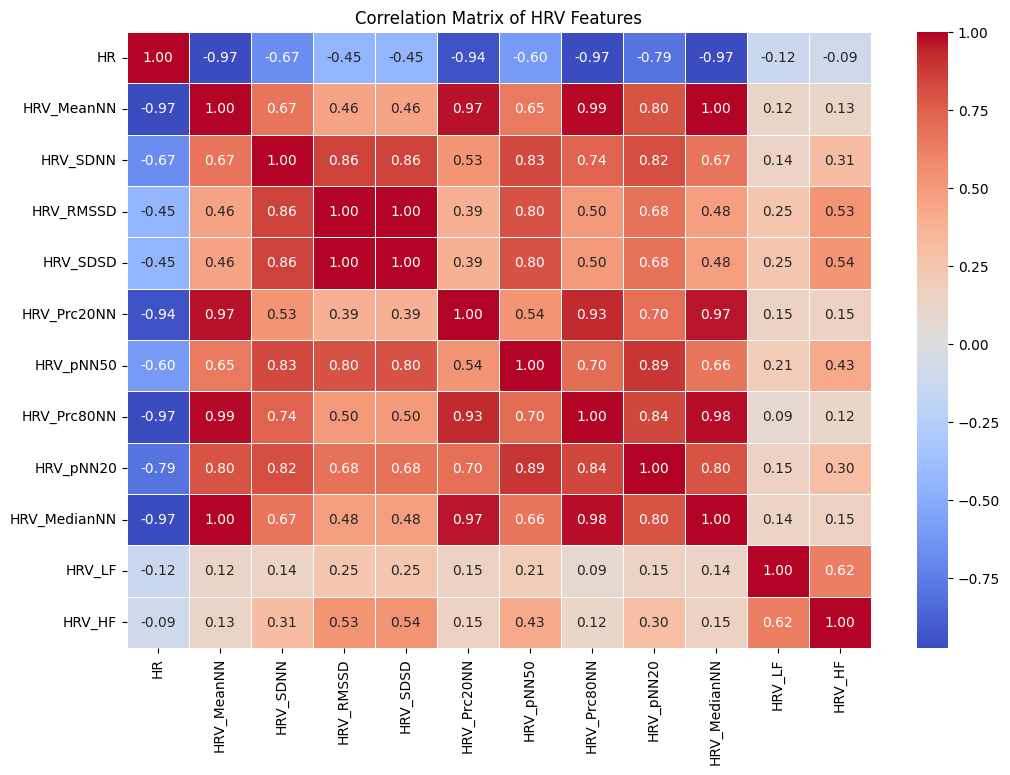

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_file=pd.read_csv('/content/for.csv')
data=data_file.iloc[:,0:12]
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of HRV Features')
plt.show()

### **Removing features**

Correlation matrix is exported to: /content/correlation_matrix.csv
Correlation heatmap is saved to: /content/correlation_heatmap.png


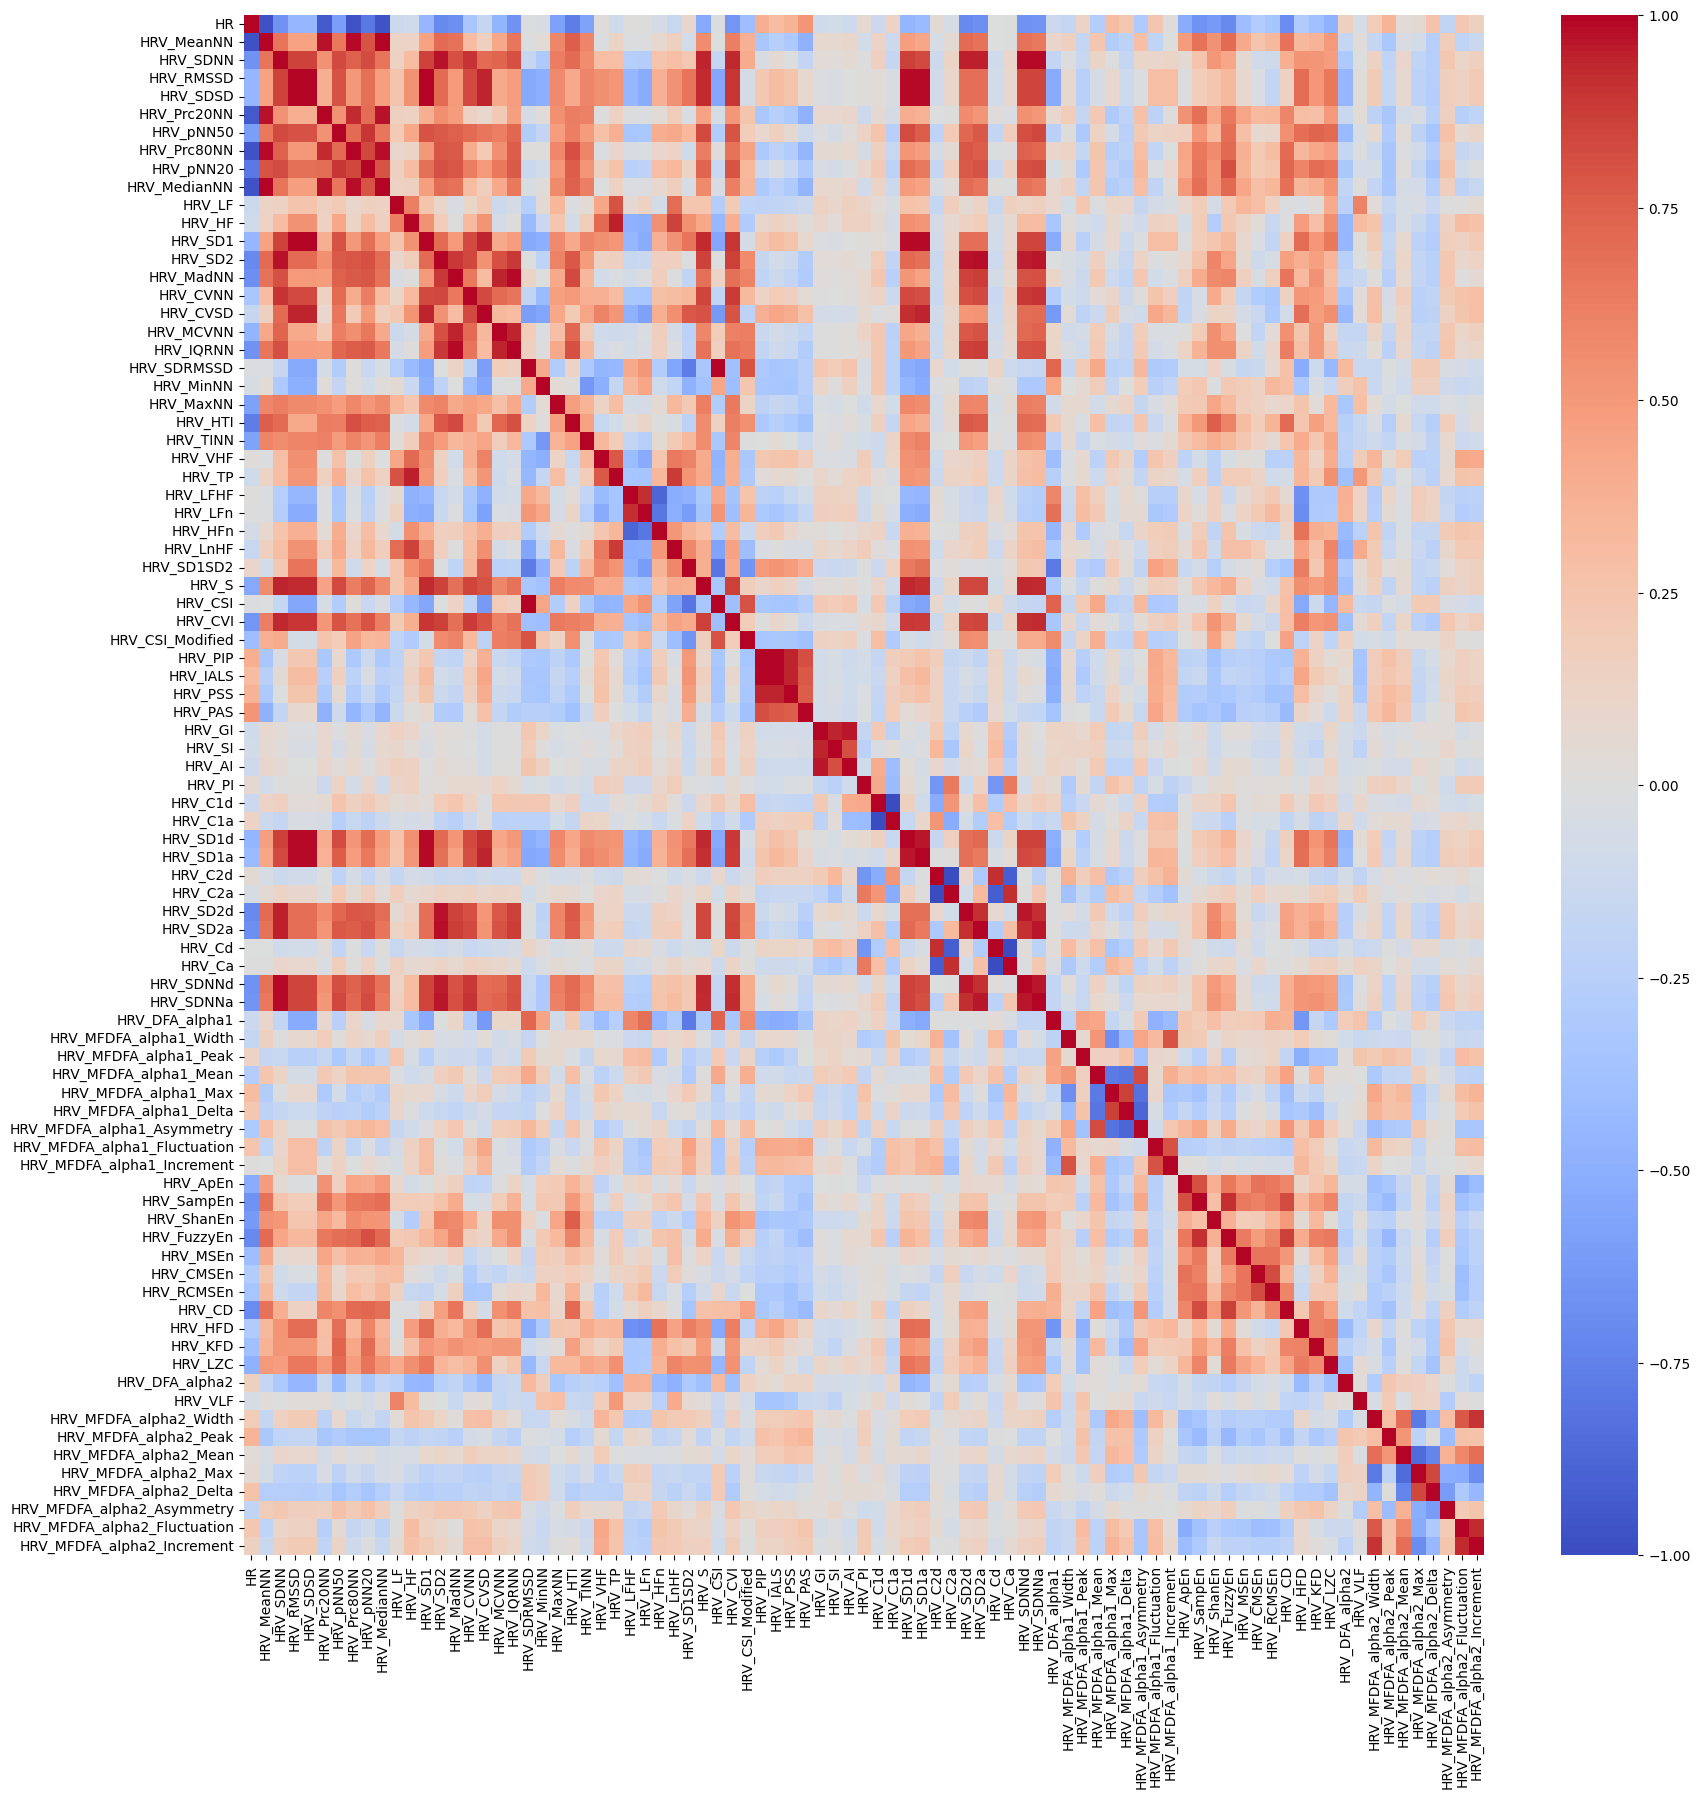

Reduced DataFrame is saved to: /content/reduced_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the functions

def get_corr_and_plot(df: pd.DataFrame, csv_path, heatmap_path):
    """
    Calculates the correlation matrix of the DataFrame, saves it to a CSV file,
    generates a correlation heatmap, and saves the heatmap as an image file.

    Parameters:
    - df: pandas DataFrame
      The original DataFrame with features.
    - csv_path: str
      The file path to save the correlation matrix as a CSV file.
    - heatmap_path: str
      The file path to save the heatmap image.
    """
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Save the correlation matrix to a CSV file
    correlation_matrix.to_csv(csv_path)
    print(f'Correlation matrix is exported to: {csv_path}')

    # Generate a correlation heatmap
    plt.figure(figsize=(20, 20))
    heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')

    # Save the heatmap as an image file
    plt.savefig(heatmap_path)
    print(f'Correlation heatmap is saved to: {heatmap_path}')

    # Show the plot
    plt.show()


def get_high_correlation_pairs(correlation_matrix, threshold=0.80) -> pd.DataFrame:
    """
    Returns a DataFrame of feature pairs with correlation values
    either greater than or equal to the threshold or less than or equal to -threshold.

    Parameters:
    - correlation_matrix: pandas DataFrame
      The correlation matrix of the dataset.
    - threshold: float (default: 0.80)
      The threshold for considering a correlation as high.

    Returns:
    - high_corr_df: pandas DataFrame
      A DataFrame containing the feature pairs and their correlation values.
    """
    # Create an empty list to store the feature pairs and their correlation values
    high_correlation_pairs = []

    # Iterate through the correlation matrix
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            # Get the correlation value
            corr_value = correlation_matrix.iloc[i, j]

            # Check if the correlation value meets the criteria
            if corr_value >= threshold or corr_value <= -threshold:
                # Add the feature pair and correlation value to the list as a tuple
                feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value) # a tuple
                high_correlation_pairs.append(feature_pair)

    # Create a DataFrame from the list of high correlation pairs
    high_corr_df = pd.DataFrame(high_correlation_pairs, columns=['Feature A', 'Feature B', 'Correlation'])

    # Sort the DataFrame by the absolute value of the correlation in descending order
    high_corr_df['Absolute Correlation'] = high_corr_df['Correlation'].abs()
    high_corr_df = high_corr_df.sort_values(by='Absolute Correlation', ascending=False).drop(columns='Absolute Correlation')

    return high_corr_df


def reduce_high_correlation_features(df: pd.DataFrame, high_corr_df: pd.DataFrame) -> pd.DataFrame:
    """
    Reduces features in the DataFrame `df` based on high correlation pairs in `high_corr_df`.

    Parameters:
    - df: pandas DataFrame
      The original DataFrame with features.
    - high_corr_df: pandas DataFrame
      A DataFrame containing highly correlated feature pairs.

    Returns:
    - reduced_df: pandas DataFrame
      The DataFrame with reduced features.
    """
    # Set to keep track of features to drop
    features_to_drop = set()

    # Iterate over the high correlation pairs
    for index, row in high_corr_df.iterrows():
        feature_a = row['Feature A']
        feature_b = row['Feature B']

        # If both features are not marked to drop, mark one of them
        if feature_a not in features_to_drop and feature_b not in features_to_drop:
            # Mark feature_b to drop (you can change this logic as needed)
            features_to_drop.add(feature_b)

    # Create a list of remaining features
    remaining_features = [feature for feature in df.columns if feature not in features_to_drop]

    # Create the reduced DataFrame with remaining features
    reduced_df = df[remaining_features]

    return reduced_df

df = pd.read_csv('/content/for.csv')
csv_path = '/content/correlation_matrix.csv'
heatmap_path = '/content/correlation_heatmap.png'
get_corr_and_plot(df, csv_path, heatmap_path)
correlation_matrix = pd.read_csv(csv_path, index_col=0)
high_corr_df = get_high_correlation_pairs(correlation_matrix)
reduced_df = reduce_high_correlation_features(df, high_corr_df)
reduced_df.to_csv('/content/Untitled.csv', index=False)
print('Reduced DataFrame is saved to: /content/reduced_data.csv')

### **Naïve Bayes classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data_file=pd.read_csv('/content/Hrv_ECG - 77column.csv')
data=data_file.iloc[:,0:20]

df = pd.DataFrame(data)
X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=20)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Model Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        23
           1       0.52      0.71      0.60        17

    accuracy                           0.60        40
   macro avg       0.61      0.61      0.60        40
weighted avg       0.63      0.60      0.60        40



### **SVM**

In [ ]:
from sklearn.svm import SVC

data_file=pd.read_csv('/content/Hrv_ECG - 77column.csv')
data=data_file.iloc[:,0:20]

df = pd.DataFrame(data)
X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

model = SVC(kernel='linear', random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Model Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.50      0.56        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

data_file=pd.read_csv('/content/without hr.csv')
data=data_file.iloc[:,:]

df = pd.DataFrame(data)
X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']
file_names = df['File_Name']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test, file_train, file_test = train_test_split(X_scaled, y, file_names, test_size=0.2, random_state=20)

model = SVC(kernel='linear', random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Model Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.83      0.50      0.62        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



### **Confusion Matrix**

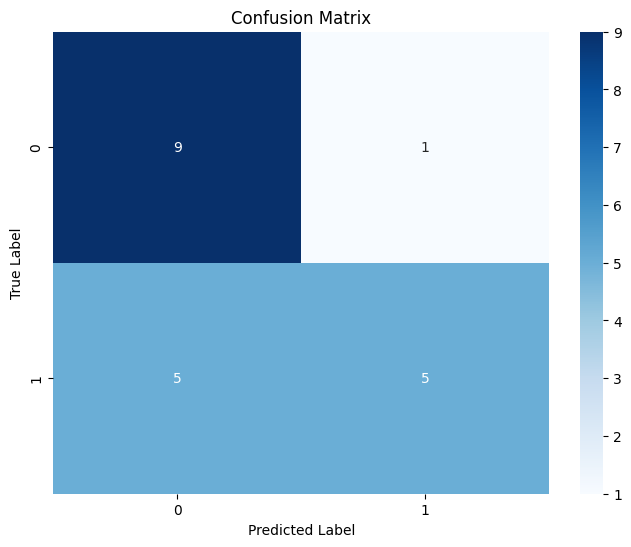

Files with incorrect predictions:
157_ECG.csv
191_ECG.csv
213_ECG.csv
205_ECG.csv
211_ECG.csv
204_ECG.csv


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

incorrect_predictions = file_test[y_test != y_pred.flatten()]
print("Files with incorrect predictions:")
for file in incorrect_predictions:
    print(file)

### **ANN Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data_file = pd.read_csv('/content/with hr.csv')
data = data_file.iloc[:,:]

df = pd.DataFrame(data)

X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.1, verbose=1)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/150
8/8 [==============================] - 2s 76ms/step - loss: 0.7146 - accuracy: 0.6111 - val_loss: 0.6172 - val_accuracy: 0.7500
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6610 - accuracy: 0.6250 - val_loss: 0.6420 - val_accuracy: 0.3750
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6335 - accuracy: 0.6944 - val_loss: 0.6559 - val_accuracy: 0.3750
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.7083 - val_loss: 0.6591 - val_accuracy: 0.3750
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.5898 - accuracy: 0.7222 - val_loss: 0.6593 - val_accuracy: 0.3750
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5723 - accuracy: 0.7778 - val_loss: 0.6691 - val_accuracy: 0.3750
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.5544 - accuracy: 0.8194 - val_loss: 0.6650 - val_accuracy: 0.3750
Epoch 8/150
8/8 [========

### **Trying to improve the model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

data_file=pd.read_csv('/content/without hr.csv')
data=data_file.iloc[:,:]

df = pd.DataFrame(data)
X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']
file_names = df['File_Name']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test, file_train, file_test = train_test_split(X_scaled, y, file_names, test_size=0.2, random_state=20)

model = SVC(kernel='rbf', random_state=20) #trying other kernels such as rbf, polynomial(poly), sigmoid
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Model Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.20      0.33        10

    accuracy                           0.60        20
   macro avg       0.78      0.60      0.52        20
weighted avg       0.78      0.60      0.52        20



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the data
data = pd.read_csv('/content/Hrv_ECG.csv')
df = pd.DataFrame(data)

X = df.drop(columns=['File_Name', 'Label'])
y = df['Label']

X.dropna(inplace=True)
y = y[X.index]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = KNeighborsClassifier(n_neighbors=3)

# Apply K-Fold Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Define K-Fold with 5 splits
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
print(f"Accuracy scores for each fold: {scores}")
print(f"Mean accuracy: {scores.mean()}")

# Optionally, fit the model on the whole dataset and print classification report
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
report = classification_report(y, y_pred)

print(f"Classification Report:\n{report}")

Accuracy scores for each fold: [0.66666667 0.5        0.4        0.2        0.4        1.
 0.2        1.         0.4        0.8       ]
Mean accuracy: 0.5566666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.67      0.53      0.59        19

    accuracy                           0.73        52
   macro avg       0.71      0.69      0.69        52
weighted avg       0.72      0.73      0.72        52



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt

class GreyWolfOptimizer:
    def __init__(self, num_agents, max_iter, num_features, n_splits=5):
        self.num_agents = num_agents
        self.max_iter = max_iter
        self.num_features = num_features
        self.n_splits = n_splits
        self.alpha_pos = np.zeros(num_features)
        self.beta_pos = np.zeros(num_features)
        self.delta_pos = np.zeros(num_features)
        self.alpha_score = float('inf')
        self.beta_score = float('inf')
        self.delta_score = float('inf')
        self.positions = np.random.randint(2, size=(num_agents, num_features))
        self.convergence_curve = []

    def fitness(self, position, X, y):
        selected_features = np.where(position == 1)[0]
        if len(selected_features) == 0:
            return float('inf')

        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        accuracy_scores = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index][:, selected_features], X[val_index][:, selected_features]
            y_train, y_val = y[train_index], y[val_index]
            model = KNeighborsClassifier(n_neighbors=3)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            accuracy_scores.append(accuracy_score(y_val, y_pred))

        return 1.0 - np.mean(accuracy_scores)

    def update_position(self, X, y):
        for i in range(self.num_agents):
            fitness = self.fitness(self.positions[i], X, y)
            if fitness < self.alpha_score:
                self.delta_score = self.beta_score
                self.delta_pos = self.beta_pos.copy()
                self.beta_score = self.alpha_score
                self.beta_pos = self.alpha_pos.copy()
                self.alpha_score = fitness
                self.alpha_pos = self.positions[i].copy()
            elif fitness < self.beta_score:
                self.delta_score = self.beta_score
                self.delta_pos = self.beta_pos.copy()
                self.beta_score = fitness
                self.beta_pos = self.positions[i].copy()
            elif fitness < self.delta_score:
                self.delta_score = fitness
                self.delta_pos = self.positions[i].copy()

    def optimize(self, X, y):
        for t in range(self.max_iter):
            a = 2 - t * (2 / self.max_iter)
            for i in range(self.num_agents):
                for j in range(self.num_features):
                    r1, r2 = random.random(), random.random()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * self.alpha_pos[j] - self.positions[i, j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha

                    r1, r2 = random.random(), random.random()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * self.beta_pos[j] - self.positions[i, j])
                    X2 = self.beta_pos[j] - A2 * D_beta

                    r1, r2 = random.random(), random.random()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * self.delta_pos[j] - self.positions[i, j])
                    X3 = self.delta_pos[j] - A3 * D_delta

                    self.positions[i, j] = (X1 + X2 + X3) / 3
                    if random.random() > 0.5:
                        self.positions[i, j] = 1
                    else:
                        self.positions[i, j] = 0

                self.update_position(X, y)

            self.convergence_curve.append(self.alpha_score)

        return self.alpha_pos

data = pd.read_csv('/content/All_hrv_features.csv')
X = data.drop(columns=['File_Name', 'Label'])
y = data['Label'].values

X.dropna(inplace=True)
y = y[X.index]

X = X.values

num_features = X.shape[1]
gwo = GreyWolfOptimizer(num_agents=10, max_iter=20, num_features=num_features, n_splits=5)
best_features = gwo.optimize(X, y)

selected_features = np.where(best_features == 1)[0]
X_fs = X[:, selected_features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, val_index in kf.split(X_fs):
    X_train_fs, X_val_fs = X_fs[train_index], X_fs[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_val_fs)
    accuracy_scores.append(accuracy_score(y_val, y_pred))

average_accuracy = np.mean(accuracy_scores)
print(f'GWO Selected Features: {selected_features}')
print(f'Average Accuracy with GWO Selected Features: {average_accuracy}')

GWO Selected Features: [ 1  2  3  6  9 12 14 15 16 20 21 22 24 27 28 29 32 36 38 39 41 43 44 48
 49 50 54 56 57 60 62 66 67 68 71 72 73 74 75 76 79 84]
Average Accuracy with GWO Selected Features: 0.6727272727272727


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt

class GreyWolfOptimizer:
    def __init__(self, num_agents, max_iter, num_features, n_splits=5):
        self.num_agents = num_agents
        self.max_iter = max_iter
        self.num_features = num_features
        self.n_splits = n_splits
        self.alpha_pos = np.zeros(num_features)
        self.beta_pos = np.zeros(num_features)
        self.delta_pos = np.zeros(num_features)
        self.alpha_score = float('inf')
        self.beta_score = float('inf')
        self.delta_score = float('inf')
        self.positions = np.random.randint(2, size=(num_agents, num_features))
        self.convergence_curve = []

    def fitness(self, position, X, y):
        selected_features = np.where(position == 1)[0]
        if len(selected_features) == 0:
            return float('inf')

        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        accuracy_scores = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index][:, selected_features], X[val_index][:, selected_features]
            y_train, y_val = y[train_index], y[val_index]
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            accuracy_scores.append(accuracy_score(y_val, y_pred))

        return 1.0 - np.mean(accuracy_scores)

    def update_position(self, X, y):
        for i in range(self.num_agents):
            fitness = self.fitness(self.positions[i], X, y)
            if fitness < self.alpha_score:
                self.delta_score = self.beta_score
                self.delta_pos = self.beta_pos.copy()
                self.beta_score = self.alpha_score
                self.beta_pos = self.alpha_pos.copy()
                self.alpha_score = fitness
                self.alpha_pos = self.positions[i].copy()
            elif fitness < self.beta_score:
                self.delta_score = self.beta_score
                self.delta_pos = self.beta_pos.copy()
                self.beta_score = fitness
                self.beta_pos = self.positions[i].copy()
            elif fitness < self.delta_score:
                self.delta_score = fitness
                self.delta_pos = self.positions[i].copy()

    def optimize(self, X, y):
        for t in range(self.max_iter):
            a = 2 - t * (2 / self.max_iter)
            for i in range(self.num_agents):
                for j in range(self.num_features):
                    r1, r2 = random.random(), random.random()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * self.alpha_pos[j] - self.positions[i, j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha

                    r1, r2 = random.random(), random.random()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * self.beta_pos[j] - self.positions[i, j])
                    X2 = self.beta_pos[j] - A2 * D_beta

                    r1, r2 = random.random(), random.random()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * self.delta_pos[j] - self.positions[i, j])
                    X3 = self.delta_pos[j] - A3 * D_delta

                    self.positions[i, j] = (X1 + X2 + X3) / 3
                    if random.random() > 0.5:
                        self.positions[i, j] = 1
                    else:
                        self.positions[i, j] = 0

                self.update_position(X, y)

            self.convergence_curve.append(self.alpha_score)

        return self.alpha_pos

data = pd.read_csv('/content/All_hrv_features.csv')
X = data.drop(columns=['File_Name', 'Label'])
y = data['Label'].values

X.dropna(inplace=True)
y = y[X.index]

X = X.values

num_features = X.shape[1]
gwo = GreyWolfOptimizer(num_agents=10, max_iter=20, num_features=num_features, n_splits=5)
best_features = gwo.optimize(X, y)

selected_features = np.where(best_features == 1)[0]
X_fs = X[:, selected_features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, val_index in kf.split(X_fs):
    X_train_fs, X_val_fs = X_fs[train_index], X_fs[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_val_fs)
    accuracy_scores.append(accuracy_score(y_val, y_pred))

average_accuracy = np.mean(accuracy_scores)
print(f'GWO Selected Features: {selected_features}')
print(f'Average Accuracy with GWO Selected Features: {average_accuracy}')

GWO Selected Features: [ 1  2  5  6  9 14 15 19 20 21 22 23 24 25 27 31 32 35 36 38 41 43 45 48
 50 51 56 61 62 65 66 68 73 74 75 76 77 79 81 82 84]
Average Accuracy with GWO Selected Features: 0.6145454545454545
